# TEST 7 - comparison with MIST tracks

In this notebook we will focus on comparing our tracks with MIST. We will use the solar mixing length parameter as they do for our grid, $\alpha_\text{MLT}$ = 1.82. Their range of metallicities is wider and they have more than we do, so we select 3 metallicities:

\[Fe/H\] = -0.5, 0, 0.25 (Z = 0.0045, 0.0142, 0.0253)


In [1]:
import mesa_reader as mr
import numpy as np 
import matplotlib.pyplot as plt

from matplotlib.lines import Line2D
from matplotlib.patches import Patch

%matplotlib ipympl

## MIST data

In [2]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

In [3]:
download('https://github.com/jieunchoi/MIST_codes/raw/master/scripts/' +
         'read_mist_models.py')

In [4]:
import read_mist_models

# Read in the EEP files

eep010_feh_p000 = read_mist_models.EEP('MIST_tracks/MIST_feh_p0.00_vvcrit0.0_EEPS/00010M.track.eep')
eep035_feh_p000 = read_mist_models.EEP('MIST_tracks/MIST_feh_p0.00_vvcrit0.0_EEPS/00035M.track.eep')
eep060_feh_p000 = read_mist_models.EEP('MIST_tracks/MIST_feh_p0.00_vvcrit0.0_EEPS/00060M.track.eep')

eep010_feh_p025 = read_mist_models.EEP('MIST_tracks/MIST_feh_p0.25_vvcrit0.0_EEPS/00010M.track.eep')
eep035_feh_p025 = read_mist_models.EEP('MIST_tracks/MIST_feh_p0.25_vvcrit0.0_EEPS/00035M.track.eep')
eep060_feh_p025 = read_mist_models.EEP('MIST_tracks/MIST_feh_p0.25_vvcrit0.0_EEPS/00060M.track.eep')

eep010_feh_m050 = read_mist_models.EEP('MIST_tracks/MIST_feh_m0.50_vvcrit0.0_EEPS/00010M.track.eep')
eep035_feh_m050 = read_mist_models.EEP('MIST_tracks/MIST_feh_m0.50_vvcrit0.0_EEPS/00035M.track.eep')
eep060_feh_m050 = read_mist_models.EEP('MIST_tracks/MIST_feh_m0.50_vvcrit0.0_EEPS/00060M.track.eep')

Reading in: MIST_tracks/MIST_feh_p0.00_vvcrit0.0_EEPS/00010M.track.eep
Reading in: MIST_tracks/MIST_feh_p0.00_vvcrit0.0_EEPS/00035M.track.eep
Reading in: MIST_tracks/MIST_feh_p0.00_vvcrit0.0_EEPS/00060M.track.eep
Reading in: MIST_tracks/MIST_feh_p0.25_vvcrit0.0_EEPS/00010M.track.eep
Reading in: MIST_tracks/MIST_feh_p0.25_vvcrit0.0_EEPS/00035M.track.eep
Reading in: MIST_tracks/MIST_feh_p0.25_vvcrit0.0_EEPS/00060M.track.eep
Reading in: MIST_tracks/MIST_feh_m0.50_vvcrit0.0_EEPS/00010M.track.eep
Reading in: MIST_tracks/MIST_feh_m0.50_vvcrit0.0_EEPS/00035M.track.eep
Reading in: MIST_tracks/MIST_feh_m0.50_vvcrit0.0_EEPS/00060M.track.eep


In [5]:
# Define the parameters
masses = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]
alphas = [1.6, 1.82]
metallicities = [0.0045, 0.0142, 0.0253]
# [Fe/H] = -0.5, 0, 0.25

# Base path template
base_path = 'test_grid_MIST_metallicities/results/mass{mass}_alpha{alpha}_z{z}/history.data'

# Create a list to store the MesaData instances and their associated alpha values
mesa_data_list = []

# Loop over the parameters to create the paths and MesaData instances
for mass in masses:
    for alpha in alphas:
        for z in metallicities:
            # Format the path
            path = base_path.format(mass=mass, alpha=alpha, z=z)
            
            try:
                # Create the MesaData instance
                mesa_data_instance = mr.MesaData(path)
                
                # Append the MesaData instance to the list
                mesa_data_list.append((mesa_data_instance, mass, z, alpha))
                
            except FileNotFoundError:
                print(f"FileNotFoundError: history.data not found for mass={mass}, alpha={alpha}, z={z}.")


## 0.10$M_\odot$

In [6]:
# fixed alpha

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.10 and mesa_data[2] == 0.0045 and mesa_data[3] == 1.82:   
        mass010_z0045_alpha182 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.10 and mesa_data[2] == 0.0142 and mesa_data[3] == 1.82:
        mass010_z0142_alpha182 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.10 and mesa_data[2] == 0.0253 and mesa_data[3] == 1.82:
        mass010_z0253_alpha182 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.10 and mesa_data[2] == 0.0045 and mesa_data[3] == 1.6:   
        mass010_z0045_alpha16 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.10 and mesa_data[2] == 0.0142 and mesa_data[3] == 1.6:
        mass010_z0142_alpha16 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.10 and mesa_data[2] == 0.0253 and mesa_data[3] == 1.6:
        mass010_z0253_alpha16 = mesa_data[0]
        break



## 0.35$M_\odot$

In [7]:
# fixed alpha 

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.35 and mesa_data[2] == 0.0045 and mesa_data[3] == 1.82:   
        mass035_z0045_alpha182 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.35 and mesa_data[2] == 0.0142 and mesa_data[3] == 1.82:
        mass035_z0142_alpha182 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.35 and mesa_data[2] == 0.0253 and mesa_data[3] == 1.82:
        mass035_z0253_alpha182 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.35 and mesa_data[2] == 0.0045 and mesa_data[3] == 1.6:   
        mass035_z0045_alpha16 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.35 and mesa_data[2] == 0.0142 and mesa_data[3] == 1.6:
        mass035_z0142_alpha16 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.35 and mesa_data[2] == 0.0253 and mesa_data[3] == 1.6:
        mass035_z0253_alpha16 = mesa_data[0]
        break
        


## 0.60$M_\odot$

In [8]:
# fixed alpha

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.60 and mesa_data[2] == 0.0045 and mesa_data[3] == 1.82:  
        mass060_z0045_alpha182 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.60 and mesa_data[2] == 0.0142 and mesa_data[3] == 1.82:
        mass060_z0142_alpha182 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.60 and mesa_data[2] == 0.0253 and mesa_data[3] == 1.82:
        mass060_z0253_alpha182 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.60 and mesa_data[2] == 0.0045 and mesa_data[3] == 1.6:  
        mass060_z0045_alpha16 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.60 and mesa_data[2] == 0.0142 and mesa_data[3] == 1.6:
        mass060_z0142_alpha16 = mesa_data[0]
        break

for mesa_data in mesa_data_list:
    if mesa_data[1] == 0.60 and mesa_data[2] == 0.0253 and mesa_data[3] == 1.6:
        mass060_z0253_alpha16 = mesa_data[0]
        break



## Metallicity influence comparing with MIST models

We need to just store the MIST tracks up to the age of the Universe (as we do)

In [9]:
# Define the target age (in years)
target_age = 13.7 * 10**9

# Define the MIST models and their corresponding parameters
models = {
    (0.00, 0.10): read_mist_models.EEP('MIST_tracks/MIST_feh_p0.00_vvcrit0.0_EEPS/00010M.track.eep'),
    (0.00, 0.35): read_mist_models.EEP('MIST_tracks/MIST_feh_p0.00_vvcrit0.0_EEPS/00035M.track.eep'),
    (0.00, 0.60): read_mist_models.EEP('MIST_tracks/MIST_feh_p0.00_vvcrit0.0_EEPS/00060M.track.eep'),
    (0.25, 0.10): read_mist_models.EEP('MIST_tracks/MIST_feh_p0.25_vvcrit0.0_EEPS/00010M.track.eep'),
    (0.25, 0.35): read_mist_models.EEP('MIST_tracks/MIST_feh_p0.25_vvcrit0.0_EEPS/00035M.track.eep'),
    (0.25, 0.60): read_mist_models.EEP('MIST_tracks/MIST_feh_p0.25_vvcrit0.0_EEPS/00060M.track.eep'),
    (-0.5, 0.10): read_mist_models.EEP('MIST_tracks/MIST_feh_m0.50_vvcrit0.0_EEPS/00010M.track.eep'),
    (-0.5, 0.35): read_mist_models.EEP('MIST_tracks/MIST_feh_m0.50_vvcrit0.0_EEPS/00035M.track.eep'),
    (-0.5, 0.60): read_mist_models.EEP('MIST_tracks/MIST_feh_m0.50_vvcrit0.0_EEPS/00060M.track.eep')
}

# Create dictionaries to store the Teff and logg values up to the target age for each combination of metallicity and mass
teff_values_up_to_target_age = {(z, mass): [] for z, mass in models.keys()}
logg_values_up_to_target_age = {(z, mass): [] for z, mass in models.keys()}

# Iterate over the models
for (z, mass), eep_model in models.items():
    # Extract the age, Teff, and logg arrays
    age = np.array(eep_model.eeps['star_age'])
    teff = 10**np.array(eep_model.eeps['log_Teff'])  # Convert log_Teff to Teff
    logg = np.array(eep_model.eeps['log_g'])
    
    # Find indices where age is less than or equal to the target age
    valid_indices = np.where(age <= target_age)[0]
    
    if valid_indices.size > 0:
        # Store the Teff and logg values up to the target age
        teff_values_up_to_target_age[(z, mass)].extend(teff[valid_indices])
        logg_values_up_to_target_age[(z, mass)].extend(logg[valid_indices])
    else:
        print(f"No data available up to target age {target_age} years for z={z}, mass={mass}.")


Reading in: MIST_tracks/MIST_feh_p0.00_vvcrit0.0_EEPS/00010M.track.eep
Reading in: MIST_tracks/MIST_feh_p0.00_vvcrit0.0_EEPS/00035M.track.eep
Reading in: MIST_tracks/MIST_feh_p0.00_vvcrit0.0_EEPS/00060M.track.eep
Reading in: MIST_tracks/MIST_feh_p0.25_vvcrit0.0_EEPS/00010M.track.eep
Reading in: MIST_tracks/MIST_feh_p0.25_vvcrit0.0_EEPS/00035M.track.eep
Reading in: MIST_tracks/MIST_feh_p0.25_vvcrit0.0_EEPS/00060M.track.eep
Reading in: MIST_tracks/MIST_feh_m0.50_vvcrit0.0_EEPS/00010M.track.eep
Reading in: MIST_tracks/MIST_feh_m0.50_vvcrit0.0_EEPS/00035M.track.eep
Reading in: MIST_tracks/MIST_feh_m0.50_vvcrit0.0_EEPS/00060M.track.eep


In [10]:
# Access the Teff values up to the target age and store them in lists

teff_at_target_age_mass010_z000 = teff_values_up_to_target_age.get((0.00, 0.10), [])
teff_at_target_age_mass035_z000 = teff_values_up_to_target_age.get((0.00, 0.35), [])
teff_at_target_age_mass060_z000 = teff_values_up_to_target_age.get((0.00, 0.60), [])
teff_at_target_age_mass010_z025 = teff_values_up_to_target_age.get((0.25, 0.10), [])
teff_at_target_age_mass035_z025 = teff_values_up_to_target_age.get((0.25, 0.35), [])
teff_at_target_age_mass060_z025 = teff_values_up_to_target_age.get((0.25, 0.60), [])
teff_at_target_age_mass010_zm050 = teff_values_up_to_target_age.get((-0.5, 0.10), [])
teff_at_target_age_mass035_zm050 = teff_values_up_to_target_age.get((-0.5, 0.35), [])
teff_at_target_age_mass060_zm050 = teff_values_up_to_target_age.get((-0.5, 0.60), [])

# Access the logg values up to the target age and store them in lists

logg_at_target_age_mass010_z000 = logg_values_up_to_target_age.get((0.00, 0.10), [])
logg_at_target_age_mass035_z000 = logg_values_up_to_target_age.get((0.00, 0.35), [])
logg_at_target_age_mass060_z000 = logg_values_up_to_target_age.get((0.00, 0.60), [])
logg_at_target_age_mass010_z025 = logg_values_up_to_target_age.get((0.25, 0.10), [])
logg_at_target_age_mass035_z025 = logg_values_up_to_target_age.get((0.25, 0.35), [])
logg_at_target_age_mass060_z025 = logg_values_up_to_target_age.get((0.25, 0.60), [])
logg_at_target_age_mass010_zm050 = logg_values_up_to_target_age.get((-0.5, 0.10), [])
logg_at_target_age_mass035_zm050 = logg_values_up_to_target_age.get((-0.5, 0.35), [])
logg_at_target_age_mass060_zm050 = logg_values_up_to_target_age.get((-0.5, 0.60), [])

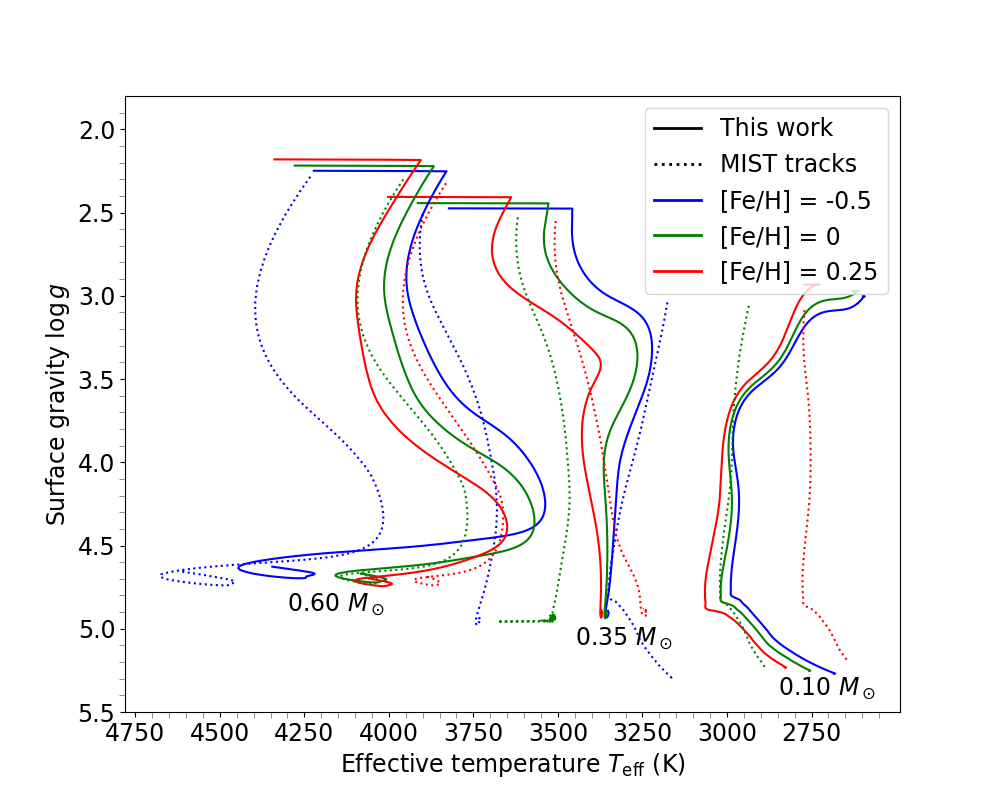

In [11]:
plt.figure(figsize=(10, 8))

plt.annotate(r'0.10 $M_\odot$', (2850, 5.4), fontsize=17)

plt.plot(mass010_z0045_alpha182.Teff, mass010_z0045_alpha182.log_g, color='blue', linestyle='-')
plt.plot(mass010_z0142_alpha182.Teff, mass010_z0142_alpha182.log_g, color='green', linestyle='-')
plt.plot(mass010_z0253_alpha182.Teff, mass010_z0253_alpha182.log_g, color='red', linestyle='-')

plt.plot(teff_at_target_age_mass010_zm050, logg_at_target_age_mass010_zm050, color='blue', ls=':')
plt.plot(teff_at_target_age_mass010_z000, logg_at_target_age_mass010_z000, color='green', ls=':')
plt.plot(teff_at_target_age_mass010_z025, logg_at_target_age_mass010_z025, color='red', ls=':')

plt.annotate(r'0.35 $M_\odot$', (3450, 5.1), fontsize=17)

plt.plot(mass035_z0045_alpha182.Teff, mass035_z0045_alpha182.log_g, color='blue', linestyle='-')
plt.plot(mass035_z0142_alpha182.Teff, mass035_z0142_alpha182.log_g, color='green', linestyle='-')
plt.plot(mass035_z0253_alpha182.Teff, mass035_z0253_alpha182.log_g, color='red', linestyle='-')

plt.plot(teff_at_target_age_mass035_zm050, logg_at_target_age_mass035_zm050, color='blue', ls=':')
plt.plot(teff_at_target_age_mass035_z000, logg_at_target_age_mass035_z000, color='green', ls=':')
plt.plot(teff_at_target_age_mass035_z025, logg_at_target_age_mass035_z025, color='red', ls=':')

plt.annotate(r'0.60 $M_\odot$', (4300, 4.9), fontsize=17)

plt.plot(mass060_z0045_alpha182.Teff, mass060_z0045_alpha182.log_g, color='blue', linestyle='-')
plt.plot(mass060_z0142_alpha182.Teff, mass060_z0142_alpha182.log_g, color='green', linestyle='-')
plt.plot(mass060_z0253_alpha182.Teff, mass060_z0253_alpha182.log_g, color='red', linestyle='-')

plt.plot(teff_at_target_age_mass060_zm050, logg_at_target_age_mass060_zm050, color='blue', ls=':')
plt.plot(teff_at_target_age_mass060_z000, logg_at_target_age_mass060_z000, color='green', ls=':')
plt.plot(teff_at_target_age_mass060_z025, logg_at_target_age_mass060_z025, color='red', ls=':')

# Set axis labels
plt.xlabel(r'Effective temperature $T_{\text{eff}}$ (K)', fontsize=17)
plt.ylabel(r'Surface gravity $\log g$', fontsize=17)

# plt.xlim(2500,5000)
# plt.ylim(2,5.5)

plt.title(r'')

# Retrieve current axis
ax = plt.gca()

# Set major and minor ticks
xmajor_ticks = np.arange(4750, 2500, -250)
xminor_ticks = np.arange(4750, 2500, -50)
ymajor_ticks = np.arange(5.5, 1.8, -0.5)
yminor_ticks = np.arange(5.5, 1.8, -0.1)

ax.set_xticks(xmajor_ticks)
ax.set_xticks(xminor_ticks, minor=True)
ax.set_yticks(ymajor_ticks)
ax.set_yticks(yminor_ticks, minor=True)

plt.ylim(1.8,5.5)

# Customize tick appearance
ax.tick_params(axis='both', which='major', labelsize=17)
ax.tick_params(axis='both', which='minor', length=4, color='gray')

# Invert axes
ax.invert_xaxis()
ax.invert_yaxis()

# Enable grid for minor ticks
#ax.grid(which='both', linestyle='--', linewidth=0.5)
#ax.grid(which='minor', linestyle=':', linewidth=0.5, alpha=0.7)

# Create a custom legend
legend_elements = [
    Line2D([0], [0], color='black', lw=2, linestyle='-', label=r'This work'),
    Line2D([0], [0], color='black', lw=2, linestyle=':', label=r'MIST tracks'),
    Line2D([0], [0], color='blue', lw=2, label=r'[Fe/H] = -0.5'),
    Line2D([0], [0], color='green', lw=2, label=r'[Fe/H] = 0'),
    Line2D([0], [0], color='red', lw=2, label=r'[Fe/H] = 0.25')
]
plt.legend(handles=legend_elements, fontsize=17, loc='upper right')

# Save figure
plt.savefig('metallicity-comparison-MIST.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()


# Isochrones

## My models isochrones

In [12]:
from scipy.interpolate import interp1d

masses = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]
alphas = [1.82]
metallicities = [0.0045, 0.0142, 0.0253]

# Create a list to store the MesaData instances and their associated parameters
mesa_data_list = []

# Define the target age (in years)
target_age = 5 * 10**9

# Loop over the parameters to create the paths and MesaData instances
for mass in masses:
    for alpha in alphas:
        for z in metallicities:
            # Format the path
            path = base_path.format(mass=mass, alpha=alpha, z=z)
            
            try:
                # Create the MesaData instance
                mesa_data_instance = mr.MesaData(path)
                
                # Append the MesaData instance and parameters to the list
                mesa_data_list.append((mesa_data_instance, mass, alpha, z))
                
            except FileNotFoundError:
                print(f"FileNotFoundError: history.data not found for mass={mass}, alpha={alpha}, z={z}.")


# Create dictionaries to store the Teff and radius values at the target age for each combination of alpha and metallicity
my_teff_at_target_age = {(alpha, z): [] for alpha in alphas for z in metallicities}

# Iterate over MesaData instances in mesa_data_list
for mesa_data, mass, alpha, z in mesa_data_list:
    # Extract the age, Teff, and radius arrays
    age = np.array(mesa_data.star_age)
    teff = np.array(mesa_data.Teff)

    # Check if the target age is within the age range of the data
    if target_age >= age[0] and target_age <= age[-1]:
        # Interpolate the Teff and radius values at the target age
        teff_interp = interp1d(age, teff, kind='linear')
        
        teff_at_age = teff_interp(target_age)
        
        # Append the interpolated Teff and radius values to the corresponding lists in the dictionaries
        my_teff_at_target_age[(alpha, z)].append(teff_at_age)
    else:
        print(f"Target age {target_age} years is out of range for mass={mass}, alpha={alpha}, z={z}.")

# Print the results for Teff at the target age
print("Teff values at target age:")
for (alpha, z), teff_list in my_teff_at_target_age.items():
    print(f"Alpha: {alpha}, Z: {z}")
    print(f"Teff values at {target_age} years: {teff_list}")
    print()


Teff values at target age:
Alpha: 1.82, Z: 0.0045
Teff values at 5000000000 years: [array(2680.82025604), array(3119.23727583), array(3265.31316814), array(3306.20807648), array(3328.33818193), array(3350.40558554), array(3394.1714488), array(3501.08534198), array(3749.51382612), array(3984.72880757), array(4252.60523993)]

Alpha: 1.82, Z: 0.0142
Teff values at 5000000000 years: [array(2754.55072466), array(3175.70422246), array(3281.810993), array(3316.06820129), array(3337.47192669), array(3356.73373811), array(3390.2481759), array(3457.26219247), array(3605.8367509), array(3837.8377565), array(4025.03936108)]

Alpha: 1.82, Z: 0.0253
Teff values at 5000000000 years: [array(2826.26178511), array(3212.32583869), array(3297.49576358), array(3327.27592315), array(3349.08185002), array(3369.81200146), array(3405.31070319), array(3473.81311748), array(3622.26259019), array(3839.32406875), array(4007.80087972)]



In [13]:
# Acess to the lists directly

my_teff_at_target_age_alpha182_z00045 = my_teff_at_target_age[(1.82, 0.0045)]
my_teff_at_target_age_alpha182_z00142 = my_teff_at_target_age[(1.82, 0.0142)]
my_teff_at_target_age_alpha182_z00253 = my_teff_at_target_age[(1.82, 0.0253)]

## MIST isochrones

In [14]:
# Define the target age (in years)
target_age = 5 * 10**9

# Define the metallicity values you want to analyze
metallicities = [0.00, 0.25, -0.5]

# Manually define the models dictionary with explicit paths for each metallicity and mass combination
models = {
    # [Fe/H] = 0.00
    (0.00, 0.10): read_mist_models.EEP('MIST_tracks/MIST_feh_p0.00_vvcrit0.0_EEPS/00010M.track.eep'),
    (0.00, 0.15): read_mist_models.EEP('MIST_tracks/MIST_feh_p0.00_vvcrit0.0_EEPS/00015M.track.eep'),
    (0.00, 0.20): read_mist_models.EEP('MIST_tracks/MIST_feh_p0.00_vvcrit0.0_EEPS/00020M.track.eep'),
    (0.00, 0.25): read_mist_models.EEP('MIST_tracks/MIST_feh_p0.00_vvcrit0.0_EEPS/00025M.track.eep'),
    (0.00, 0.30): read_mist_models.EEP('MIST_tracks/MIST_feh_p0.00_vvcrit0.0_EEPS/00030M.track.eep'),
    (0.00, 0.35): read_mist_models.EEP('MIST_tracks/MIST_feh_p0.00_vvcrit0.0_EEPS/00035M.track.eep'),
    (0.00, 0.40): read_mist_models.EEP('MIST_tracks/MIST_feh_p0.00_vvcrit0.0_EEPS/00040M.track.eep'),
    (0.00, 0.45): read_mist_models.EEP('MIST_tracks/MIST_feh_p0.00_vvcrit0.0_EEPS/00045M.track.eep'),
    (0.00, 0.50): read_mist_models.EEP('MIST_tracks/MIST_feh_p0.00_vvcrit0.0_EEPS/00050M.track.eep'),
    (0.00, 0.55): read_mist_models.EEP('MIST_tracks/MIST_feh_p0.00_vvcrit0.0_EEPS/00055M.track.eep'),
    (0.00, 0.60): read_mist_models.EEP('MIST_tracks/MIST_feh_p0.00_vvcrit0.0_EEPS/00060M.track.eep'),

    # [Fe/H] = 0.25
    (0.25, 0.10): read_mist_models.EEP('MIST_tracks/MIST_feh_p0.25_vvcrit0.0_EEPS/00010M.track.eep'),
    (0.25, 0.15): read_mist_models.EEP('MIST_tracks/MIST_feh_p0.25_vvcrit0.0_EEPS/00015M.track.eep'),
    (0.25, 0.20): read_mist_models.EEP('MIST_tracks/MIST_feh_p0.25_vvcrit0.0_EEPS/00020M.track.eep'),
    (0.25, 0.25): read_mist_models.EEP('MIST_tracks/MIST_feh_p0.25_vvcrit0.0_EEPS/00025M.track.eep'),
    (0.25, 0.30): read_mist_models.EEP('MIST_tracks/MIST_feh_p0.25_vvcrit0.0_EEPS/00030M.track.eep'),
    (0.25, 0.35): read_mist_models.EEP('MIST_tracks/MIST_feh_p0.25_vvcrit0.0_EEPS/00035M.track.eep'),
    (0.25, 0.40): read_mist_models.EEP('MIST_tracks/MIST_feh_p0.25_vvcrit0.0_EEPS/00040M.track.eep'),
    (0.25, 0.45): read_mist_models.EEP('MIST_tracks/MIST_feh_p0.25_vvcrit0.0_EEPS/00045M.track.eep'),
    (0.25, 0.50): read_mist_models.EEP('MIST_tracks/MIST_feh_p0.25_vvcrit0.0_EEPS/00050M.track.eep'),
    (0.25, 0.55): read_mist_models.EEP('MIST_tracks/MIST_feh_p0.25_vvcrit0.0_EEPS/00055M.track.eep'),
    (0.25, 0.60): read_mist_models.EEP('MIST_tracks/MIST_feh_p0.25_vvcrit0.0_EEPS/00060M.track.eep'),

    # [Fe/H] = -0.50
    (-0.50, 0.10): read_mist_models.EEP('MIST_tracks/MIST_feh_m0.50_vvcrit0.0_EEPS/00010M.track.eep'),
    (-0.50, 0.15): read_mist_models.EEP('MIST_tracks/MIST_feh_m0.50_vvcrit0.0_EEPS/00015M.track.eep'),
    (-0.50, 0.20): read_mist_models.EEP('MIST_tracks/MIST_feh_m0.50_vvcrit0.0_EEPS/00020M.track.eep'),
    (-0.50, 0.25): read_mist_models.EEP('MIST_tracks/MIST_feh_m0.50_vvcrit0.0_EEPS/00025M.track.eep'),
    (-0.50, 0.30): read_mist_models.EEP('MIST_tracks/MIST_feh_m0.50_vvcrit0.0_EEPS/00030M.track.eep'),
    (-0.50, 0.35): read_mist_models.EEP('MIST_tracks/MIST_feh_m0.50_vvcrit0.0_EEPS/00035M.track.eep'),
    (-0.50, 0.40): read_mist_models.EEP('MIST_tracks/MIST_feh_m0.50_vvcrit0.0_EEPS/00040M.track.eep'),
    (-0.50, 0.45): read_mist_models.EEP('MIST_tracks/MIST_feh_m0.50_vvcrit0.0_EEPS/00045M.track.eep'),
    (-0.50, 0.50): read_mist_models.EEP('MIST_tracks/MIST_feh_m0.50_vvcrit0.0_EEPS/00050M.track.eep'),
    (-0.50, 0.55): read_mist_models.EEP('MIST_tracks/MIST_feh_m0.50_vvcrit0.0_EEPS/00055M.track.eep'),
    (-0.50, 0.60): read_mist_models.EEP('MIST_tracks/MIST_feh_m0.50_vvcrit0.0_EEPS/00060M.track.eep')
}

# This dictionary now contains all the specified combinations of metallicity and mass with their corresponding EEP files.

# Create dictionaries to store the Teff and logg values at the closest age to the target age for each combination of metallicity and mass
teff_at_target_age = {}
logg_at_target_age = {}

# Iterate over the models
for (z, mass), eep_model in models.items():
    # Extract the age, Teff, and logg arrays
    age = np.array(eep_model.eeps['star_age'])
    teff = 10**np.array(eep_model.eeps['log_Teff'])  # Convert log_Teff to Teff
    logg = np.array(eep_model.eeps['log_g'])
    
    # Find the index of the closest age to the target age
    closest_index = np.argmin(np.abs(age - target_age))
    
    # Store the Teff and logg values at the closest age
    teff_at_target_age[(z, mass)] = teff[closest_index]
    logg_at_target_age[(z, mass)] = logg[closest_index]
    

Reading in: MIST_tracks/MIST_feh_p0.00_vvcrit0.0_EEPS/00010M.track.eep
Reading in: MIST_tracks/MIST_feh_p0.00_vvcrit0.0_EEPS/00015M.track.eep
Reading in: MIST_tracks/MIST_feh_p0.00_vvcrit0.0_EEPS/00020M.track.eep
Reading in: MIST_tracks/MIST_feh_p0.00_vvcrit0.0_EEPS/00025M.track.eep
Reading in: MIST_tracks/MIST_feh_p0.00_vvcrit0.0_EEPS/00030M.track.eep
Reading in: MIST_tracks/MIST_feh_p0.00_vvcrit0.0_EEPS/00035M.track.eep
Reading in: MIST_tracks/MIST_feh_p0.00_vvcrit0.0_EEPS/00040M.track.eep
Reading in: MIST_tracks/MIST_feh_p0.00_vvcrit0.0_EEPS/00045M.track.eep
Reading in: MIST_tracks/MIST_feh_p0.00_vvcrit0.0_EEPS/00050M.track.eep
Reading in: MIST_tracks/MIST_feh_p0.00_vvcrit0.0_EEPS/00055M.track.eep
Reading in: MIST_tracks/MIST_feh_p0.00_vvcrit0.0_EEPS/00060M.track.eep
Reading in: MIST_tracks/MIST_feh_p0.25_vvcrit0.0_EEPS/00010M.track.eep
Reading in: MIST_tracks/MIST_feh_p0.25_vvcrit0.0_EEPS/00015M.track.eep
Reading in: MIST_tracks/MIST_feh_p0.25_vvcrit0.0_EEPS/00020M.track.eep
Readin

In [15]:
# Accessing Teff values at the target age for all models

# [Fe/H] = 0.00
teff_at_target_age_feh_p00_mass01 = teff_at_target_age[(0.00, 0.10)]
teff_at_target_age_feh_p00_mass015 = teff_at_target_age[(0.00, 0.15)]
teff_at_target_age_feh_p00_mass02 = teff_at_target_age[(0.00, 0.20)]
teff_at_target_age_feh_p00_mass025 = teff_at_target_age[(0.00, 0.25)]
teff_at_target_age_feh_p00_mass03 = teff_at_target_age[(0.00, 0.30)]
teff_at_target_age_feh_p00_mass035 = teff_at_target_age[(0.00, 0.35)]
teff_at_target_age_feh_p00_mass04 = teff_at_target_age[(0.00, 0.40)]
teff_at_target_age_feh_p00_mass045 = teff_at_target_age[(0.00, 0.45)]
teff_at_target_age_feh_p00_mass05 = teff_at_target_age[(0.00, 0.50)]
teff_at_target_age_feh_p00_mass055 = teff_at_target_age[(0.00, 0.55)]
teff_at_target_age_feh_p00_mass06 = teff_at_target_age[(0.00, 0.60)]

# [Fe/H] = 0.25
teff_at_target_age_feh_p025_mass01 = teff_at_target_age[(0.25, 0.10)]
teff_at_target_age_feh_p025_mass015 = teff_at_target_age[(0.25, 0.15)]
teff_at_target_age_feh_p025_mass02 = teff_at_target_age[(0.25, 0.20)]
teff_at_target_age_feh_p025_mass025 = teff_at_target_age[(0.25, 0.25)]
teff_at_target_age_feh_p025_mass03 = teff_at_target_age[(0.25, 0.30)]
teff_at_target_age_feh_p025_mass035 = teff_at_target_age[(0.25, 0.35)]
teff_at_target_age_feh_p025_mass04 = teff_at_target_age[(0.25, 0.40)]
teff_at_target_age_feh_p025_mass045 = teff_at_target_age[(0.25, 0.45)]
teff_at_target_age_feh_p025_mass05 = teff_at_target_age[(0.25, 0.50)]
teff_at_target_age_feh_p025_mass055 = teff_at_target_age[(0.25, 0.55)]
teff_at_target_age_feh_p025_mass06 = teff_at_target_age[(0.25, 0.60)]

# [Fe/H] = -0.50
teff_at_target_age_feh_m050_mass01 = teff_at_target_age[(-0.50, 0.10)]
teff_at_target_age_feh_m050_mass015 = teff_at_target_age[(-0.50, 0.15)]
teff_at_target_age_feh_m050_mass02 = teff_at_target_age[(-0.50, 0.20)]
teff_at_target_age_feh_m050_mass025 = teff_at_target_age[(-0.50, 0.25)]
teff_at_target_age_feh_m050_mass03 = teff_at_target_age[(-0.50, 0.30)]
teff_at_target_age_feh_m050_mass035 = teff_at_target_age[(-0.50, 0.35)]
teff_at_target_age_feh_m050_mass04 = teff_at_target_age[(-0.50, 0.40)]
teff_at_target_age_feh_m050_mass045 = teff_at_target_age[(-0.50, 0.45)]
teff_at_target_age_feh_m050_mass05 = teff_at_target_age[(-0.50, 0.50)]
teff_at_target_age_feh_m050_mass055 = teff_at_target_age[(-0.50, 0.55)]
teff_at_target_age_feh_m050_mass06 = teff_at_target_age[(-0.50, 0.60)]


In [16]:
# List for [Fe/H] = 0.00
MIST_teff_at_target_age_feh_p00 = [
    teff_at_target_age_feh_p00_mass01,
    teff_at_target_age_feh_p00_mass015,
    teff_at_target_age_feh_p00_mass02,
    teff_at_target_age_feh_p00_mass025,
    teff_at_target_age_feh_p00_mass03,
    teff_at_target_age_feh_p00_mass035,
    teff_at_target_age_feh_p00_mass04,
    teff_at_target_age_feh_p00_mass045,
    teff_at_target_age_feh_p00_mass05,
    teff_at_target_age_feh_p00_mass055,
    teff_at_target_age_feh_p00_mass06
]

# List for [Fe/H] = 0.25
MIST_teff_at_target_age_feh_p025 = [
    teff_at_target_age_feh_p025_mass01,
    teff_at_target_age_feh_p025_mass015,
    teff_at_target_age_feh_p025_mass02,
    teff_at_target_age_feh_p025_mass025,
    teff_at_target_age_feh_p025_mass03,
    teff_at_target_age_feh_p025_mass035,
    teff_at_target_age_feh_p025_mass04,
    teff_at_target_age_feh_p025_mass045,
    teff_at_target_age_feh_p025_mass05,
    teff_at_target_age_feh_p025_mass055,
    teff_at_target_age_feh_p025_mass06
]

# List for [Fe/H] = -0.50
MIST_teff_at_target_age_feh_m050 = [
    teff_at_target_age_feh_m050_mass01,
    teff_at_target_age_feh_m050_mass015,
    teff_at_target_age_feh_m050_mass02,
    teff_at_target_age_feh_m050_mass025,
    teff_at_target_age_feh_m050_mass03,
    teff_at_target_age_feh_m050_mass035,
    teff_at_target_age_feh_m050_mass04,
    teff_at_target_age_feh_m050_mass045,
    teff_at_target_age_feh_m050_mass05,
    teff_at_target_age_feh_m050_mass055,
    teff_at_target_age_feh_m050_mass06
]


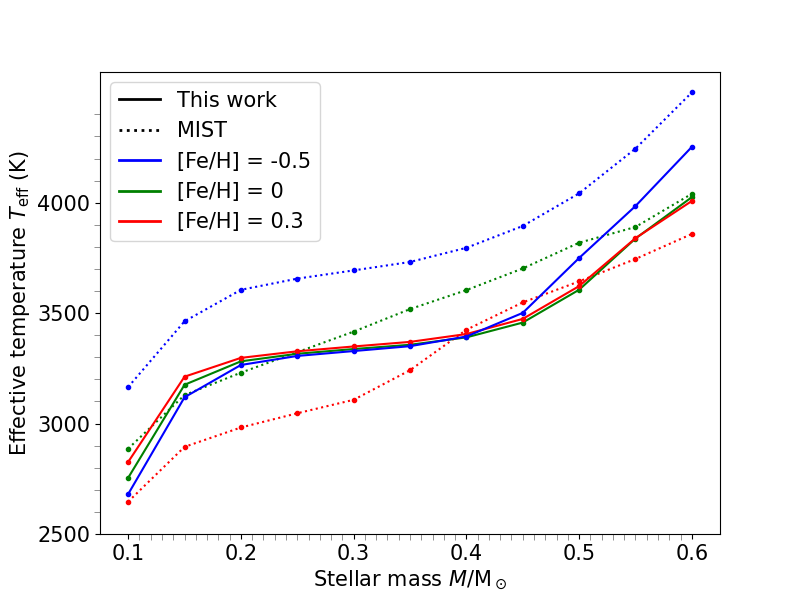

In [17]:
plt.figure(figsize=(8, 6))

plt.plot(masses, MIST_teff_at_target_age_feh_p00, color='green', marker='.', linestyle=':')
plt.plot(masses, MIST_teff_at_target_age_feh_p025, color='red', marker='.', linestyle=':')
plt.plot(masses, MIST_teff_at_target_age_feh_m050, color='blue', marker='.', linestyle=':')

plt.plot(masses, my_teff_at_target_age_alpha182_z00142, color='green', marker='.', linestyle='-')
plt.plot(masses, my_teff_at_target_age_alpha182_z00253, color='red', marker='.', linestyle='-')
plt.plot(masses, my_teff_at_target_age_alpha182_z00045, color='blue', marker='.', linestyle='-')

# Set axis labels
plt.xlabel(r'Stellar mass $M/$M$_\odot$', fontsize=15)
plt.ylabel(r'Effective temperature $T_{\text{eff}}$ (K)', fontsize=15)

plt.title(r'', fontsize=15)

# Retrieve current axis
ax = plt.gca()

# Set major and minor ticks
xmajor_ticks = np.arange(0.1, 0.65, 0.1)
xminor_ticks = np.arange(0.1, 0.6, 0.01)
ymajor_ticks = np.arange(2500, 4500, 500)
yminor_ticks = np.arange(2500, 4500, 100)

ax.set_xticks(xmajor_ticks)
ax.set_xticks(xminor_ticks, minor=True)
ax.set_yticks(ymajor_ticks)
ax.set_yticks(yminor_ticks, minor=True)

# Customize tick appearance
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', length=4, color='gray')

plt.xticks(fontsize=15) 
plt.yticks(fontsize=15) 

# Create a custom legend
legend_elements = [
    Line2D([0], [0], color='black', lw=2, linestyle='-', label=r'This work'),
    Line2D([0], [0], color='black', lw=2, linestyle=':', label=r'MIST'),
    Line2D([0], [0], color='blue', lw=2, label=r'[Fe/H] = -0.5'),
    Line2D([0], [0], color='green', lw=2, label=r'[Fe/H] = 0'),
    Line2D([0], [0], color='red', lw=2, label=r'[Fe/H] = 0.3'),
]
plt.legend(handles=legend_elements, fontsize=15, loc='best')

# Save figure
plt.savefig('isochrones-comparison-MIST.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()
